In [1]:
import pandas as pd
import numpy as np

# import required libraries for dataframe and visualization
from matplotlib import pyplot
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
%matplotlib inline

# import required libraries for building the model
import sklearn
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from skopt import BayesSearchCV
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
df = pd.read_csv('final_data_cleaned_17nov.csv')

In [43]:
#from google.colab import files
#data_to_load = files.upload()

Saving final_data_cleaned_17nov.csv to final_data_cleaned_17nov (1).csv


In [44]:
#import io
#df = pd.read_csv(io.BytesIO(data_to_load['final_data_cleaned_17nov.csv']))

In [3]:
df = df.drop(['Unnamed: 0'], axis = 1)
df

,SEQN,Cadmium (ug/L),Lead (ug/dL),Blood manganese (ug/L),"Mercury, total (ug/L)",Blood selenium(ug/L),LDL-Cholesterol,Lymphocyte number,Monocyte number,Segmented neutrophils number,...,Citizenship,USStayLength,MaritalStatus,PregnancyStatus,FamilyIncome,PovertyRatio,is_diabetic,large_family,college_educated,high_risk
0,73559,0.22,1.45,9.57,1.27,209.64,126.00,1.0,0.80,4.90,...,1,Unknown,Married,NotApplicable,Medium,4.51,1,0.0,1.0,1
1,73564,0.37,1.00,16.80,0.42,195.62,168.00,1.6,0.30,3.00,...,1,Unknown,Separated/Divorced,Unknown,Medium,5.00,0,0.0,1.0,0
2,73607,0.50,1.35,8.31,0.33,219.00,161.00,2.3,0.60,3.80,...,1,Unknown,Married,NotApplicable,Low,1.08,0,0.0,0.0,0
3,73621,0.36,1.38,8.14,0.87,212.84,161.00,0.8,0.40,2.80,...,1,Unknown,Married,NotApplicable,Medium,5.00,1,0.0,1.0,0
4,73633,0.07,0.59,9.62,0.20,168.49,195.00,2.1,0.50,5.00,...,1,Unknown,Married,NotPregnant,Medium,3.56,0,1.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8966,83717,0.79,1.62,11.19,2.41,205.41,222.35,2.2,0.54,3.93,...,0,Long Term (> 10 Years),Separated/Divorced,Unknown,Low,0.70,0,1.0,0.0,0
8967,83721,0.79,1.62,11.19,2.41,205.41,222.35,2.2,0.54,3.93,...,1,Short Term (< 10 Years),Married,NotApplicable,High,5.00,0,0.0,1.0,1
8968,83724,0.79,1.62,11.19,2.41,205.41,222.35,2.2,0.54,3.93,...,1,Unknown,Married,NotApplicable,Low,3.09,0,0.0,0.0,0
8969,83726,0.79,1.62,11.19,2.41,205.41,222.35,2.2,0.54,3.93,...,0,Long Term (> 10 Years),Separated/Divorced,NotApplicable,Medium,3.81,0,0.0,0.0,1


In [4]:
cols = df.columns.tolist()
print(cols)

['SEQN', 'Cadmium (ug/L)', 'Lead (ug/dL)', 'Blood manganese (ug/L)', 'Mercury, total (ug/L)', 'Blood selenium(ug/L)', 'LDL-Cholesterol', 'Lymphocyte number', 'Monocyte number', 'Segmented neutrophils number', 'Eosinophils number', 'Basophils number', 'Red cell count SI', 'Hemoglobin (g/dL)', 'Platelet count (%) SI', 'Glycohemoglobin (%)', 'Insulin (uU/mL)', 'Two Hour Glucose(OGTT) (mg/dL)', 'Total # of Dietary Supplements Taken', 'Any Dietary Supplements Taken?', 'Energy (kcal)', 'Protein (gm)', 'Carbohydrate (gm)', 'Total sugars (gm)', 'Dietary fiber (gm)', 'Total fat (gm)', 'Total saturated fatty acids (gm)', 'Total monounsaturated fatty acids (gm)', 'Total polyunsaturated fatty acids (gm)', 'Cholesterol (mg)', 'Lycopene (mcg)', 'Lutein + zeaxanthin (mcg)', 'Thiamin (Vitamin B1) (mg)', 'Riboflavin (Vitamin B2) (mg)', 'Niacin (mg)', 'Vitamin B6 (mg)', 'Folic acid (mcg)', 'Folate, DFE (mcg)', 'Total choline (mg)', 'Vitamin B12 (mcg)', 'Vitamin C (mg)', 'Vitamin K (mcg)', 'Vitamin D (D2

In [7]:
df.corr()

,SEQN,Cadmium (ug/L),Lead (ug/dL),Blood manganese (ug/L),"Mercury, total (ug/L)",Blood selenium(ug/L),LDL-Cholesterol,Lymphocyte number,Monocyte number,Segmented neutrophils number,...,How often add salt to food at table,Total bottled water drank yesterday (gm),Theobromine (mg),AgeYears,Citizenship,PovertyRatio,is_diabetic,large_family,college_educated,high_risk
SEQN,1.000000,0.329274,0.214057,-0.036661,0.102825,-0.038132,0.024865,0.121486,0.005083,-0.035851,...,0.029116,0.014549,0.015588,-0.008277,-0.017640,0.000864,-0.027224,0.015541,-0.033262,0.169558
Cadmium (ug/L),0.329274,1.000000,0.388522,0.141141,0.264139,0.177614,0.364116,0.160253,0.073959,0.136179,...,0.024616,-0.025204,0.032253,0.042813,0.047160,-0.016257,-0.011225,-0.044765,0.025625,0.046823
Lead (ug/dL),0.214057,0.388522,1.000000,-0.004717,0.259646,0.073391,0.255788,-0.012166,0.097787,0.020102,...,0.040020,-0.040430,-0.012349,0.111228,-0.003852,0.014716,0.058783,-0.075940,0.026996,0.086276
Blood manganese (ug/L),-0.036661,0.141141,-0.004717,1.000000,0.224124,0.153310,0.138844,0.075782,-0.136944,-0.038215,...,-0.009276,-0.022439,0.003533,-0.082241,-0.033600,-0.005634,-0.121634,0.033302,0.008897,-0.056136
"Mercury, total (ug/L)",0.102825,0.264139,0.259646,0.224124,1.000000,0.292165,0.302260,0.060645,-0.084745,-0.075815,...,-0.009417,-0.011461,-0.019376,0.038917,-0.012813,0.058095,-0.003779,-0.037446,0.056187,0.004570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PovertyRatio,0.000864,-0.016257,0.014716,-0.005634,0.058095,0.038290,0.061933,-0.038993,-0.032584,-0.036358,...,-0.025408,-0.030641,0.011067,0.093818,0.077596,1.000000,0.041453,-0.134929,0.221885,-0.025572
is_diabetic,-0.027224,-0.011225,0.058783,-0.121634,-0.003779,0.007547,0.008904,-0.070516,0.047025,0.037270,...,0.062345,0.032467,-0.016723,0.553696,0.045912,0.041453,1.000000,-0.255252,-0.059064,0.206918
large_family,0.015541,-0.044765,-0.075940,0.033302,-0.037446,-0.033556,-0.040184,0.040831,-0.050132,-0.033322,...,-0.056742,0.000270,0.016234,-0.449174,-0.090052,-0.134929,-0.255252,1.000000,-0.032644,-0.092808
college_educated,-0.033262,0.025625,0.026996,0.008897,0.056187,0.055224,0.095121,-0.010796,-0.011813,0.002664,...,-0.043012,-0.041646,-0.006388,-0.137032,0.108210,0.221885,-0.059064,-0.032644,1.000000,-0.036730


In [8]:
df_with_dummies = pd.get_dummies(df)
df_with_dummies

,SEQN,Cadmium (ug/L),Lead (ug/dL),Blood manganese (ug/L),"Mercury, total (ug/L)",Blood selenium(ug/L),LDL-Cholesterol,Lymphocyte number,Monocyte number,Segmented neutrophils number,...,MaritalStatus_Single,MaritalStatus_Unknown,PregnancyStatus_CannotTell,PregnancyStatus_NotApplicable,PregnancyStatus_NotPregnant,PregnancyStatus_Pregnant,PregnancyStatus_Unknown,FamilyIncome_High,FamilyIncome_Low,FamilyIncome_Medium
0,73559,0.22,1.45,9.57,1.27,209.64,126.00,1.0,0.80,4.90,...,0,0,0,1,0,0,0,0,0,1
1,73564,0.37,1.00,16.80,0.42,195.62,168.00,1.6,0.30,3.00,...,0,0,0,0,0,0,1,0,0,1
2,73607,0.50,1.35,8.31,0.33,219.00,161.00,2.3,0.60,3.80,...,0,0,0,1,0,0,0,0,1,0
3,73621,0.36,1.38,8.14,0.87,212.84,161.00,0.8,0.40,2.80,...,0,0,0,1,0,0,0,0,0,1
4,73633,0.07,0.59,9.62,0.20,168.49,195.00,2.1,0.50,5.00,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8966,83717,0.79,1.62,11.19,2.41,205.41,222.35,2.2,0.54,3.93,...,0,0,0,0,0,0,1,0,1,0
8967,83721,0.79,1.62,11.19,2.41,205.41,222.35,2.2,0.54,3.93,...,0,0,0,1,0,0,0,1,0,0
8968,83724,0.79,1.62,11.19,2.41,205.41,222.35,2.2,0.54,3.93,...,0,0,0,1,0,0,0,0,1,0
8969,83726,0.79,1.62,11.19,2.41,205.41,222.35,2.2,0.54,3.93,...,0,0,0,1,0,0,0,0,0,1


In [9]:
df_with_dummies = df_with_dummies.dropna()
df_with_dummies

,SEQN,Cadmium (ug/L),Lead (ug/dL),Blood manganese (ug/L),"Mercury, total (ug/L)",Blood selenium(ug/L),LDL-Cholesterol,Lymphocyte number,Monocyte number,Segmented neutrophils number,...,MaritalStatus_Single,MaritalStatus_Unknown,PregnancyStatus_CannotTell,PregnancyStatus_NotApplicable,PregnancyStatus_NotPregnant,PregnancyStatus_Pregnant,PregnancyStatus_Unknown,FamilyIncome_High,FamilyIncome_Low,FamilyIncome_Medium
0,73559,0.22,1.45,9.57,1.27,209.64,126.00,1.0,0.80,4.90,...,0,0,0,1,0,0,0,0,0,1
1,73564,0.37,1.00,16.80,0.42,195.62,168.00,1.6,0.30,3.00,...,0,0,0,0,0,0,1,0,0,1
2,73607,0.50,1.35,8.31,0.33,219.00,161.00,2.3,0.60,3.80,...,0,0,0,1,0,0,0,0,1,0
3,73621,0.36,1.38,8.14,0.87,212.84,161.00,0.8,0.40,2.80,...,0,0,0,1,0,0,0,0,0,1
4,73633,0.07,0.59,9.62,0.20,168.49,195.00,2.1,0.50,5.00,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8966,83717,0.79,1.62,11.19,2.41,205.41,222.35,2.2,0.54,3.93,...,0,0,0,0,0,0,1,0,1,0
8967,83721,0.79,1.62,11.19,2.41,205.41,222.35,2.2,0.54,3.93,...,0,0,0,1,0,0,0,1,0,0
8968,83724,0.79,1.62,11.19,2.41,205.41,222.35,2.2,0.54,3.93,...,0,0,0,1,0,0,0,0,1,0
8969,83726,0.79,1.62,11.19,2.41,205.41,222.35,2.2,0.54,3.93,...,0,0,0,1,0,0,0,0,0,1


In [10]:
# create X and y

X_unscaled = df_with_dummies.drop(['is_diabetic','SEQN'], axis = 1)
y = df_with_dummies['is_diabetic']

#scale X for faster convergance

scaler = StandardScaler()

X = scaler.fit_transform(X_unscaled)


#train and test split

X_train, X_test,y_train,y_test = train_test_split(X,y,test_size =0.3, random_state = 42, stratify = y)


# CV

cv_inner = KFold(n_splits=3, shuffle=True, random_state=42)
cv_outer = KFold(n_splits=10, shuffle=True, random_state=42)

### Linear SVC

In [51]:
#Build Model

param_grid = {'C': [0.001,0.01,0.1,1, 10]}

lsvc = GridSearchCV(SVC(kernel = 'linear',probability = True), param_grid, scoring='accuracy', n_jobs=1, cv=cv_inner, refit=True,verbose=2)
#lsvc = GridSearchCV(SVC(kernel = 'linear',probability = True),param_grid,refit=True,verbose=2)
lsvc.fit(X_train,y_train)

lsvc_predictions = lsvc.predict(X_test)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] END ............................................C=0.001; total time=   4.8s
[CV] END ............................................C=0.001; total time=   4.7s
[CV] END ............................................C=0.001; total time=   4.9s
[CV] END .............................................C=0.01; total time=   4.0s
[CV] END .............................................C=0.01; total time=   3.9s
[CV] END .............................................C=0.01; total time=   4.1s
[CV] END ..............................................C=0.1; total time=   5.6s
[CV] END ..............................................C=0.1; total time=   5.7s
[CV] END ..............................................C=0.1; total time=   6.1s
[CV] END ................................................C=1; total time=  18.9s
[CV] END ................................................C=1; total time=  18.3s
[CV] END ........................................

In [52]:
#Get best estimator and average score
print(lsvc.best_estimator_)

scores = cross_val_score(lsvc, X_test, y_test, scoring='accuracy', cv=cv_outer, n_jobs=-1)
print(scores)
print('Linear SVC average score: {}'.format(scores.mean()))

SVC(C=0.01, kernel='linear', probability=True)
[0.8037037  0.8037037  0.76951673 0.78438662 0.78066914 0.82156134
 0.79182156 0.83271375 0.73977695 0.79182156]
Linear SVC average score: 0.7919675065399973


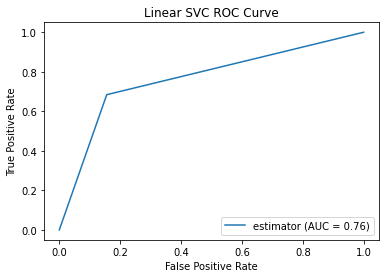

In [53]:
#ROC Curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, lsvc_predictions)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='estimator')
display.plot()
plt.title("Linear SVC ROC Curve")
plt.show()

In [54]:
#Features used
importance_lsvc = lsvc.best_estimator_.coef_[0]
cols_new = X_unscaled.columns.tolist()
importance_index_lsvc = np.nonzero(importance_lsvc)[0]

for i in importance_index_lsvc:
    print(cols_new[i], ': ', importance_lsvc[i])

Cadmium (ug/L) :  -0.039216185144917086
Lead (ug/dL) :  0.04715368516640173
Blood manganese (ug/L) :  -0.06872483601261106
Mercury, total (ug/L) :  0.007375131103610408
Blood selenium(ug/L) :  0.054195930091542666
LDL-Cholesterol :  -0.041625307410373326
Lymphocyte number :  0.05272911075467846
Monocyte number :  -0.011662384701442114
Segmented neutrophils number :  0.008896779510837623
Eosinophils number :  -0.01140862391955427
Basophils number :  -0.06634010454034171
Red cell count SI :  0.04498241866747863
Hemoglobin (g/dL) :  -0.12523594750310352
Platelet count (%) SI :  -0.1771869052285818
Glycohemoglobin (%) :  0.3233463300648109
Insulin (uU/mL) :  0.06372818143798131
Two Hour Glucose(OGTT) (mg/dL) :  0.06886442933677542
Total # of Dietary Supplements Taken :  -0.0009225522817688367
Any Dietary Supplements Taken? :  -0.0881820919605259
Energy (kcal) :  0.0732785780894435
Protein (gm) :  -0.17456754325492765
Carbohydrate (gm) :  0.05389703730940167
Total sugars (gm) :  -0.20097240

In [55]:
#Rank Features
for importance, name in sorted(zip(lsvc.best_estimator_.coef_[0], X_unscaled.columns),reverse=True)[:20]:
    print (name, importance)

AgeYears 0.874032428578143
Glycohemoglobin (%) 0.3233463300648109
Average Sagittal Abdominal Diameter (cm) 0.2267885083160233
Potassium (mg) 0.16168275319280745
Waist Circumference (cm) 0.1342942311567142
Citizenship 0.12058601347352663
Vitamin D (D2 + D3) (mcg) 0.10245029673987466
Overall Oral Health Exam Status 0.0927925550493444
Energy (kcal) 0.0732785780894435
Iron (mg) 0.07288414742100413
Two Hour Glucose(OGTT) (mg/dL) 0.06886442933677542
Magnesium (mg) 0.0655320997868319
Insulin (uU/mL) 0.06372818143798131
Total saturated fatty acids (gm) 0.0622753368776303
Body Mass Index (kg/m**2) 0.05885198328557072
PregnancyStatus_Unknown 0.05828004258326793
FamilyIncome_Medium 0.05795951711299244
Blood selenium(ug/L) 0.054195930091542666
Carbohydrate (gm) 0.05389703730940167
Lymphocyte number 0.05272911075467846


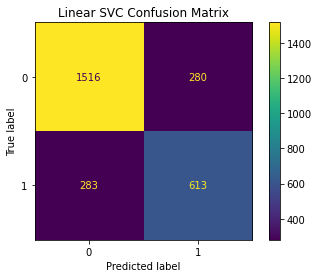

In [56]:
#Confusion Matrix display
cm_lsvc = confusion_matrix(y_test, lsvc_predictions)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_lsvc,
                              display_labels=lsvc.classes_)
disp.plot()

plt.title('Linear SVC Confusion Matrix')

plt.show()

In [57]:
y_test_df_lsvc = pd.DataFrame(y_test).reset_index()
y_prob_df_lsvc = pd.DataFrame(lsvc.predict_proba(X_test), columns = ['p_not_diabetic','p_diabetic'])
y_prob_df_lsvc['predicted'] = lsvc_predictions
y_prob_df_lsvc['actual'] = y_test_df_lsvc['is_diabetic']
y_prob_df_lsvc['risk'] = 0
mask = (y_prob_df_lsvc['p_diabetic'] >= 0.4) & (y_prob_df_lsvc['p_diabetic'] <= 0.5)
y_prob_df_lsvc['risk'][mask] = 1
y_prob_df_lsvc

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,p_not_diabetic,p_diabetic,predicted,actual,risk
0,0.907500,0.092500,0,0,0
1,0.985108,0.014892,0,0,0
2,0.403510,0.596490,1,1,0
3,0.980562,0.019438,0,0,0
4,0.167812,0.832188,1,0,0
...,...,...,...,...,...
2687,0.942397,0.057603,0,0,0
2688,0.131899,0.868101,1,1,0
2689,0.409765,0.590235,1,1,0
2690,0.932817,0.067183,0,0,0


#### Logistic Regression

In [58]:
#Build Model

param_grid = {'C': [0.001,0.01,0.1,1, 10], 'penalty':['l1','l2']}

lr = GridSearchCV(LogisticRegression(solver = 'liblinear'), param_grid, scoring='accuracy', n_jobs=1, cv=cv_inner, refit=True,verbose=2)
lr.fit(X_train,y_train)

lr.fit(X_train,y_train)

lr_predictions = lr.predict(X_test)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END ................................C=0.001, penalty=l1; total time=   0.1s
[CV] END ................................C=0.001, penalty=l1; total time=   0.0s
[CV] END ................................C=0.001, penalty=l1; total time=   0.0s
[CV] END ................................C=0.001, penalty=l2; total time=   0.1s
[CV] END ................................C=0.001, penalty=l2; total time=   0.1s
[CV] END ................................C=0.001, penalty=l2; total time=   0.1s
[CV] END .................................C=0.01, penalty=l1; total time=   0.1s
[CV] END .................................C=0.01, penalty=l1; total time=   0.1s
[CV] END .................................C=0.01, penalty=l1; total time=   0.1s
[CV] END .................................C=0.01, penalty=l2; total time=   0.1s
[CV] END .................................C=0.01, penalty=l2; total time=   0.1s
[CV] END .................................C=0.01

In [59]:
print(lr.best_estimator_)

scores = cross_val_score(lr, X_test, y_test, scoring='accuracy', cv=cv_outer, n_jobs=-1)
print(scores)
print('Logistic Regression average score: {}'.format(scores.mean()))

LogisticRegression(C=0.1, penalty='l1', solver='liblinear')
[0.8        0.81111111 0.78810409 0.79553903 0.78066914 0.79182156
 0.7732342  0.82527881 0.75836431 0.79182156]
Logistic Regression average score: 0.7915943824865759


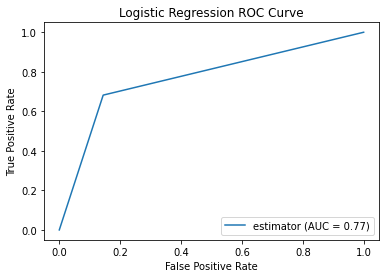

In [60]:
#ROC Curve

fpr, tpr, thresholds = metrics.roc_curve(y_test, lr_predictions)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='estimator')
display.plot()
plt.title("Logistic Regression ROC Curve")

plt.show()

In [61]:
#Features Used

importance_lr = lr.best_estimator_.coef_[0]
cols_new = X_unscaled.columns.tolist()
importance_index_lr = np.nonzero(importance_lr)[0]

for i in importance_index_lr:
    print(cols_new[i], ': ', importance_lr[i])

Cadmium (ug/L) :  -0.07027021018037387
Lead (ug/dL) :  0.005954001648732332
Blood manganese (ug/L) :  -0.10721947155316279
Blood selenium(ug/L) :  0.0490449235487943
LDL-Cholesterol :  -0.01406472697942305
Lymphocyte number :  0.045729432994577206
Segmented neutrophils number :  0.008711233181959353
Eosinophils number :  -0.002545158963618036
Basophils number :  -0.06326589200313469
Red cell count SI :  0.013559918922623052
Hemoglobin (g/dL) :  -0.14009508720089206
Platelet count (%) SI :  -0.2764861083239135
Glycohemoglobin (%) :  0.49118536492018644
Insulin (uU/mL) :  0.07127455495598949
Two Hour Glucose(OGTT) (mg/dL) :  0.07431575713184362
Total # of Dietary Supplements Taken :  0.01741569741829626
Any Dietary Supplements Taken? :  -0.08430562789262251
Energy (kcal) :  0.02531034495616109
Protein (gm) :  -0.2146987945446643
Carbohydrate (gm) :  0.07255195152331345
Total sugars (gm) :  -0.26933246393017135
Total fat (gm) :  0.0007505081368887206
Total saturated fatty acids (gm) :  0.

In [62]:
#Rank Features
for importance, name in sorted(zip(lr.best_estimator_.coef_[0], X_unscaled.columns),reverse=True)[:20]:
    print (name, importance)

AgeYears 1.368639898602472
Glycohemoglobin (%) 0.49118536492018644
Waist Circumference (cm) 0.31809552675370917
Potassium (mg) 0.19308834788269097
Average Sagittal Abdominal Diameter (cm) 0.1676354835786963
Vitamin D (D2 + D3) (mcg) 0.14349596584785185
Citizenship 0.13726830903332043
Iron (mg) 0.12245229361388231
PregnancyStatus_Unknown 0.1118714575471304
Overall Oral Health Exam Status 0.08728002109037669
Two Hour Glucose(OGTT) (mg/dL) 0.07431575713184362
Carbohydrate (gm) 0.07255195152331345
Insulin (uU/mL) 0.07127455495598949
Total choline (mg) 0.06735298556406479
FamilyIncome_Medium 0.057134582428667535
Total bottled water drank yesterday (gm) 0.04967700138239148
Blood selenium(ug/L) 0.0490449235487943
Lymphocyte number 0.045729432994577206
Zinc (mg) 0.04504594010535763
Arm Circumference (cm) 0.042977948595405775


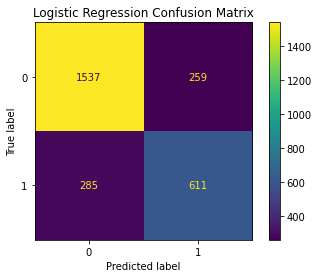

In [63]:
#Confusion Matrix

cm_lr = confusion_matrix(y_test, lr_predictions)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_lr,
                              display_labels=lr.classes_)
disp.plot()

plt.title('Logistic Regression Confusion Matrix')

plt.show()

In [64]:
y_test_df_lr = pd.DataFrame(y_test).reset_index()
y_prob_df_lr = pd.DataFrame(lr.predict_proba(X_test), columns = ['p_not_diabetic','p_diabetic'])
y_prob_df_lr['predicted'] = lr_predictions
y_prob_df_lr['actual'] = y_test_df_lr['is_diabetic']
y_prob_df_lr['risk'] = 0
mask = (y_prob_df_lr['p_diabetic'] >= 0.4) & (y_prob_df_lr['p_diabetic'] <= 0.5)
y_prob_df_lr['risk'][mask] = 1
y_prob_df_lr

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,p_not_diabetic,p_diabetic,predicted,actual,risk
0,0.980804,0.019196,0,0,0
1,0.993424,0.006576,0,0,0
2,0.361299,0.638701,1,1,0
3,0.992988,0.007012,0,0,0
4,0.229889,0.770111,1,0,0
...,...,...,...,...,...
2687,0.987635,0.012365,0,0,0
2688,0.137767,0.862233,1,1,0
2689,0.356869,0.643131,1,1,0
2690,0.935312,0.064688,0,0,0


### Decision Tree


In [65]:
#Build Model

param_grid = {'criterion':['gini','entropy'],'max_depth': range(2,15), 'min_samples_split':range(2,10), 'min_samples_leaf':range(2,5)}


dtc = GridSearchCV(DecisionTreeClassifier(), param_grid, scoring='accuracy', n_jobs=1, cv=cv_inner, refit=True,verbose=2)
dtc.fit(X_train,y_train)

dtc_predictions = dtc.predict(X_test)

Fitting 3 folds for each of 624 candidates, totalling 1872 fits
[CV] END criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=2; total time=   0.1s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=3; total time=   0.1s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=3; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=3; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf

In [66]:
print(dtc.best_estimator_)

scores = cross_val_score(dtc, X_test, y_test, scoring='accuracy', cv=cv_outer, n_jobs=-1)
print(scores)
print('Decision Tree Classifier average score: {}'.format(scores.mean()))

DecisionTreeClassifier(max_depth=8, min_samples_leaf=4, min_samples_split=4)
[0.77037037 0.78888889 0.73605948 0.78438662 0.76208178 0.75836431
 0.80297398 0.78438662 0.7732342  0.80297398]
Decision Tree Classifier average score: 0.776372022580201


[Text(497.23295454545456, 770.1, 'AgeYears <= 0.131\ngini = 0.444\nsamples = 100.0%\nvalue = [0.667, 0.333]\nclass = ['),
 Text(173.10681818181817, 679.5, 'AgeYears <= -0.41\ngini = 0.152\nsamples = 50.3%\nvalue = [0.917, 0.083]\nclass = ['),
 Text(91.30909090909091, 588.9, 'Glycohemoglobin (%) <= 2.741\ngini = 0.054\nsamples = 36.2%\nvalue = [0.972, 0.028]\nclass = ['),
 Text(84.54545454545455, 498.3, 'Body Mass Index (kg/m**2) <= 2.768\ngini = 0.051\nsamples = 36.1%\nvalue = [0.974, 0.026]\nclass = ['),
 Text(54.10909090909091, 407.7, 'Waist Circumference (cm) <= 0.188\ngini = 0.044\nsamples = 35.8%\nvalue = [0.978, 0.022]\nclass = ['),
 Text(33.81818181818182, 317.1, 'Dietary fiber (gm) <= -0.143\ngini = 0.028\nsamples = 30.1%\nvalue = [0.986, 0.014]\nclass = ['),
 Text(13.527272727272727, 226.5, 'Red cell count SI <= -0.338\ngini = 0.011\nsamples = 20.2%\nvalue = [0.994, 0.006]\nclass = ['),
 Text(6.763636363636364, 135.89999999999998, 'gini = 0.48\nsamples = 0.1%\nvalue = [0.6, 0.

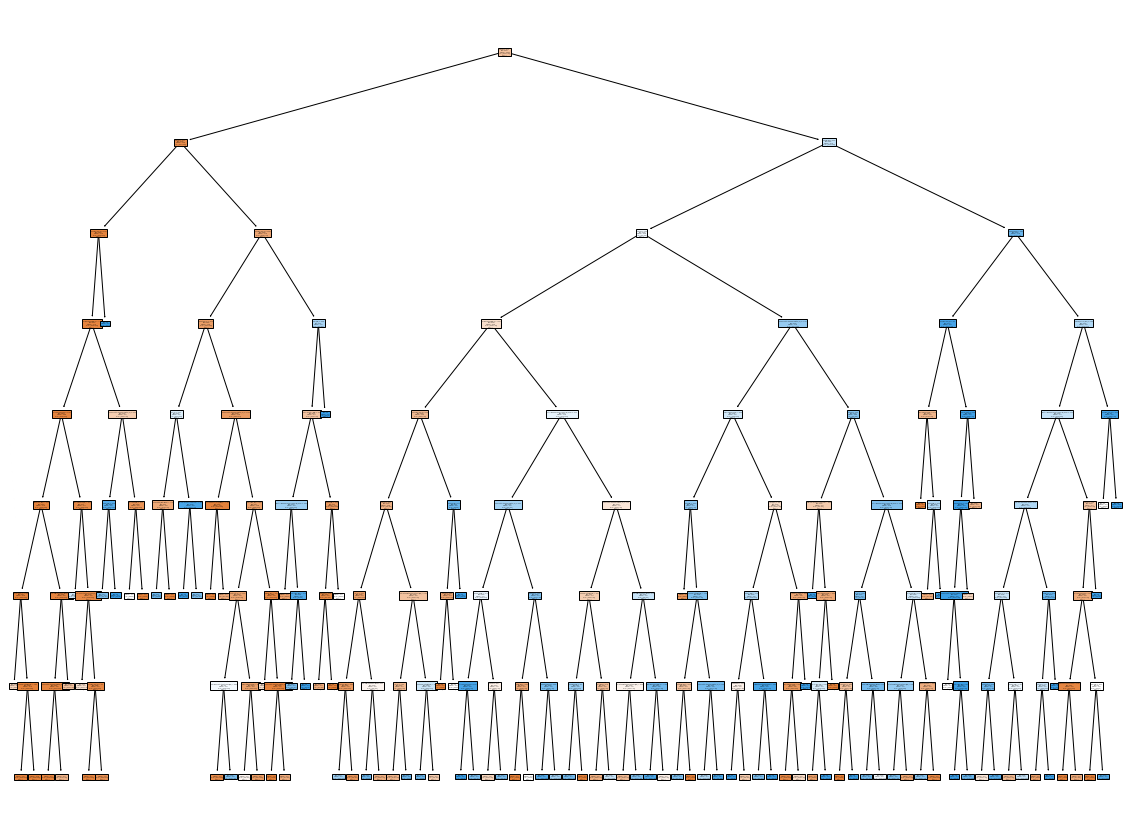

In [67]:
#Refit with best parameters to plot tree and for best feature identification later

dtc2 = dtc.best_estimator_.fit(X_train,y_train)

#Plot Tree

cn = list(str(df['is_diabetic'].unique()))
fn = list(X_unscaled.columns)

plt.figure(figsize = (20,15))

plot_tree(dtc2, feature_names = fn, class_names = cn, filled = True, proportion=True)

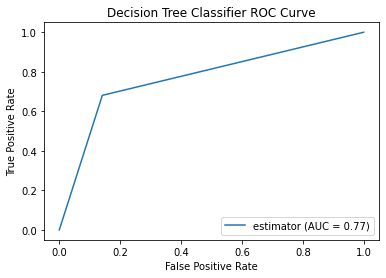

In [68]:
#ROC Curve

fpr, tpr, thresholds = metrics.roc_curve(y_test, dtc_predictions)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='estimator')
display.plot()

plt.title("Decision Tree Classifier ROC Curve")

plt.show()

In [69]:
#Rank Features

for importance, name in sorted(zip(dtc2.feature_importances_, X_unscaled.columns),reverse=True)[:20]:
    print (name, importance)

AgeYears 0.5977857074981191
Potassium (mg) 0.056351456309571835
Glycohemoglobin (%) 0.04538769071274273
Body Mass Index (kg/m**2) 0.03097210269189353
Average Sagittal Abdominal Diameter (cm) 0.02642004983532083
Basophils number 0.022570164591293868
Diastolic: Blood pressure (second reading) mm Hg 0.019134734952014894
Arm Circumference (cm) 0.016148056859585647
Copper (mg) 0.014328156193299519
Total bottled water drank yesterday (gm) 0.012383759935687976
Combined grip strength (kg) 0.012216164171815688
Height-Length difference flagged 0.00881599424645074
Cholesterol (mg) 0.00859767288170678
Lead (ug/dL) 0.008457807767310027
Citizenship 0.007511970941929961
Zinc (mg) 0.007508675315052373
Iron (mg) 0.006086738914929502
Vitamin D (D2 + D3) (mcg) 0.005645123315879134
Sodium (mg) 0.005598618367674911
Red cell count SI 0.005180354475772469


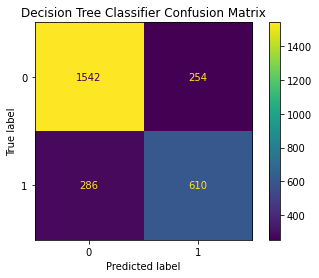

In [70]:
#Confusion Matrix

cm_dtc = confusion_matrix(y_test, dtc_predictions)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_dtc,
                              display_labels=dtc.classes_)
disp.plot()

plt.title('Decision Tree Classifier Confusion Matrix')

plt.show()

### Random Forest

In [12]:
#Randomised Search to narrow range

param_grid = {'criterion':['gini','entropy'],'max_depth': range(2,25), 'min_samples_split':range(2,10), 'min_samples_leaf':range(2,5)}

rf = RandomizedSearchCV(RandomForestClassifier(), param_grid,n_iter = 100, scoring='accuracy', n_jobs=1, cv=cv_inner, refit=True,verbose=2)
rf.fit(X_train,y_train)

rf_predictions = rf.predict(X_test)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=4, min_samples_split=8; total time=   0.4s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=4, min_samples_split=8; total time=   0.4s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=4, min_samples_split=8; total time=   0.4s
[CV] END criterion=gini, max_depth=20, min_samples_leaf=4, min_samples_split=4; total time=   1.1s
[CV] END criterion=gini, max_depth=20, min_samples_leaf=4, min_samples_split=4; total time=   1.0s
[CV] END criterion=gini, max_depth=20, min_samples_leaf=4, min_samples_split=4; total time=   1.0s
[CV] END criterion=entropy, max_depth=15, min_samples_leaf=4, min_samples_split=9; total time=   1.1s
[CV] END criterion=entropy, max_depth=15, min_samples_leaf=4, min_samples_split=9; total time=   1.1s
[CV] END criterion=entropy, max_depth=15, min_samples_leaf=4, min_samples_split=9; total time=   1.2s
[CV] END criterion=gini, max_de

[CV] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=3; total time=   0.6s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=3; total time=   0.6s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=3; total time=   0.6s
[CV] END criterion=entropy, max_depth=14, min_samples_leaf=4, min_samples_split=3; total time=   1.1s
[CV] END criterion=entropy, max_depth=14, min_samples_leaf=4, min_samples_split=3; total time=   1.1s
[CV] END criterion=entropy, max_depth=14, min_samples_leaf=4, min_samples_split=3; total time=   1.1s
[CV] END criterion=entropy, max_depth=11, min_samples_leaf=2, min_samples_split=5; total time=   1.1s
[CV] END criterion=entropy, max_depth=11, min_samples_leaf=2, min_samples_split=5; total time=   1.1s
[CV] END criterion=entropy, max_depth=11, min_samples_leaf=2, min_samples_split=5; total time=   1.1s
[CV] END criterion=entropy, max_depth=24, min_samples_leaf=2, min_samples_split=3; total time=

[CV] END criterion=entropy, max_depth=17, min_samples_leaf=3, min_samples_split=2; total time=   1.2s
[CV] END criterion=entropy, max_depth=17, min_samples_leaf=3, min_samples_split=2; total time=   1.2s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=3; total time=   0.9s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=3; total time=   0.9s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=3; total time=   0.9s
[CV] END criterion=entropy, max_depth=21, min_samples_leaf=2, min_samples_split=5; total time=   1.3s
[CV] END criterion=entropy, max_depth=21, min_samples_leaf=2, min_samples_split=5; total time=   1.3s
[CV] END criterion=entropy, max_depth=21, min_samples_leaf=2, min_samples_split=5; total time=   1.3s
[CV] END criterion=gini, max_depth=18, min_samples_leaf=2, min_samples_split=6; total time=   1.1s
[CV] END criterion=gini, max_depth=18, min_samples_leaf=2, min_samples_split=6; total ti

[CV] END criterion=entropy, max_depth=2, min_samples_leaf=4, min_samples_split=7; total time=   0.3s
[CV] END criterion=entropy, max_depth=21, min_samples_leaf=4, min_samples_split=5; total time=   1.2s
[CV] END criterion=entropy, max_depth=21, min_samples_leaf=4, min_samples_split=5; total time=   1.2s
[CV] END criterion=entropy, max_depth=21, min_samples_leaf=4, min_samples_split=5; total time=   1.2s
[CV] END criterion=gini, max_depth=17, min_samples_leaf=3, min_samples_split=9; total time=   1.1s
[CV] END criterion=gini, max_depth=17, min_samples_leaf=3, min_samples_split=9; total time=   1.0s
[CV] END criterion=gini, max_depth=17, min_samples_leaf=3, min_samples_split=9; total time=   1.0s
[CV] END criterion=entropy, max_depth=11, min_samples_leaf=2, min_samples_split=6; total time=   1.1s
[CV] END criterion=entropy, max_depth=11, min_samples_leaf=2, min_samples_split=6; total time=   1.1s
[CV] END criterion=entropy, max_depth=11, min_samples_leaf=2, min_samples_split=6; total tim

In [35]:
#Identify best parameters

print(rf.best_estimator_)

RandomForestClassifier(max_depth=17, min_samples_leaf=3, min_samples_split=9)


In [36]:
# Run grid search

param_grid = {'criterion':['gini','entropy'],'max_depth': range(15,25), 'min_samples_split':range(2,10), 'min_samples_leaf':range(2,5)}

rf = GridSearchCV(RandomForestClassifier(), param_grid, scoring='accuracy', n_jobs=1, cv=cv_inner, refit=True,verbose=2)
rf.fit(X_train,y_train)

rf_predictions = rf.predict(X_test)

Fitting 3 folds for each of 480 candidates, totalling 1440 fits
[CV] END criterion=gini, max_depth=15, min_samples_leaf=2, min_samples_split=2; total time=   1.2s
[CV] END criterion=gini, max_depth=15, min_samples_leaf=2, min_samples_split=2; total time=   1.2s
[CV] END criterion=gini, max_depth=15, min_samples_leaf=2, min_samples_split=2; total time=   1.1s
[CV] END criterion=gini, max_depth=15, min_samples_leaf=2, min_samples_split=3; total time=   1.1s
[CV] END criterion=gini, max_depth=15, min_samples_leaf=2, min_samples_split=3; total time=   1.1s
[CV] END criterion=gini, max_depth=15, min_samples_leaf=2, min_samples_split=3; total time=   1.2s
[CV] END criterion=gini, max_depth=15, min_samples_leaf=2, min_samples_split=4; total time=   1.1s
[CV] END criterion=gini, max_depth=15, min_samples_leaf=2, min_samples_split=4; total time=   1.2s
[CV] END criterion=gini, max_depth=15, min_samples_leaf=2, min_samples_split=4; total time=   1.2s
[CV] END criterion=gini, max_depth=15, min_sa

[CV] END criterion=gini, max_depth=16, min_samples_leaf=2, min_samples_split=5; total time=   1.2s
[CV] END criterion=gini, max_depth=16, min_samples_leaf=2, min_samples_split=6; total time=   1.1s
[CV] END criterion=gini, max_depth=16, min_samples_leaf=2, min_samples_split=6; total time=   1.1s
[CV] END criterion=gini, max_depth=16, min_samples_leaf=2, min_samples_split=6; total time=   1.1s
[CV] END criterion=gini, max_depth=16, min_samples_leaf=2, min_samples_split=7; total time=   1.1s
[CV] END criterion=gini, max_depth=16, min_samples_leaf=2, min_samples_split=7; total time=   1.1s
[CV] END criterion=gini, max_depth=16, min_samples_leaf=2, min_samples_split=7; total time=   1.2s
[CV] END criterion=gini, max_depth=16, min_samples_leaf=2, min_samples_split=8; total time=   1.2s
[CV] END criterion=gini, max_depth=16, min_samples_leaf=2, min_samples_split=8; total time=   1.1s
[CV] END criterion=gini, max_depth=16, min_samples_leaf=2, min_samples_split=8; total time=   1.2s
[CV] END c

[CV] END criterion=gini, max_depth=17, min_samples_leaf=2, min_samples_split=9; total time=   1.3s
[CV] END criterion=gini, max_depth=17, min_samples_leaf=2, min_samples_split=9; total time=   1.3s
[CV] END criterion=gini, max_depth=17, min_samples_leaf=3, min_samples_split=2; total time=   1.3s
[CV] END criterion=gini, max_depth=17, min_samples_leaf=3, min_samples_split=2; total time=   1.3s
[CV] END criterion=gini, max_depth=17, min_samples_leaf=3, min_samples_split=2; total time=   1.4s
[CV] END criterion=gini, max_depth=17, min_samples_leaf=3, min_samples_split=3; total time=   1.8s
[CV] END criterion=gini, max_depth=17, min_samples_leaf=3, min_samples_split=3; total time=   1.7s
[CV] END criterion=gini, max_depth=17, min_samples_leaf=3, min_samples_split=3; total time=   1.9s
[CV] END criterion=gini, max_depth=17, min_samples_leaf=3, min_samples_split=4; total time=   2.1s
[CV] END criterion=gini, max_depth=17, min_samples_leaf=3, min_samples_split=4; total time=   1.8s
[CV] END c

[CV] END criterion=gini, max_depth=18, min_samples_leaf=3, min_samples_split=5; total time=   2.0s
[CV] END criterion=gini, max_depth=18, min_samples_leaf=3, min_samples_split=5; total time=   1.9s
[CV] END criterion=gini, max_depth=18, min_samples_leaf=3, min_samples_split=5; total time=   1.9s
[CV] END criterion=gini, max_depth=18, min_samples_leaf=3, min_samples_split=6; total time=   1.8s
[CV] END criterion=gini, max_depth=18, min_samples_leaf=3, min_samples_split=6; total time=   1.8s
[CV] END criterion=gini, max_depth=18, min_samples_leaf=3, min_samples_split=6; total time=   1.9s
[CV] END criterion=gini, max_depth=18, min_samples_leaf=3, min_samples_split=7; total time=   1.8s
[CV] END criterion=gini, max_depth=18, min_samples_leaf=3, min_samples_split=7; total time=   1.8s
[CV] END criterion=gini, max_depth=18, min_samples_leaf=3, min_samples_split=7; total time=   1.7s
[CV] END criterion=gini, max_depth=18, min_samples_leaf=3, min_samples_split=8; total time=   1.8s
[CV] END c

[CV] END criterion=gini, max_depth=19, min_samples_leaf=3, min_samples_split=8; total time=   1.5s
[CV] END criterion=gini, max_depth=19, min_samples_leaf=3, min_samples_split=9; total time=   1.4s
[CV] END criterion=gini, max_depth=19, min_samples_leaf=3, min_samples_split=9; total time=   1.4s
[CV] END criterion=gini, max_depth=19, min_samples_leaf=3, min_samples_split=9; total time=   1.5s
[CV] END criterion=gini, max_depth=19, min_samples_leaf=4, min_samples_split=2; total time=   1.6s
[CV] END criterion=gini, max_depth=19, min_samples_leaf=4, min_samples_split=2; total time=   1.4s
[CV] END criterion=gini, max_depth=19, min_samples_leaf=4, min_samples_split=2; total time=   1.5s
[CV] END criterion=gini, max_depth=19, min_samples_leaf=4, min_samples_split=3; total time=   1.5s
[CV] END criterion=gini, max_depth=19, min_samples_leaf=4, min_samples_split=3; total time=   1.9s
[CV] END criterion=gini, max_depth=19, min_samples_leaf=4, min_samples_split=3; total time=   1.8s
[CV] END c

[CV] END criterion=gini, max_depth=20, min_samples_leaf=4, min_samples_split=4; total time=   2.5s
[CV] END criterion=gini, max_depth=20, min_samples_leaf=4, min_samples_split=4; total time=   2.4s
[CV] END criterion=gini, max_depth=20, min_samples_leaf=4, min_samples_split=5; total time=   2.8s
[CV] END criterion=gini, max_depth=20, min_samples_leaf=4, min_samples_split=5; total time=   3.2s
[CV] END criterion=gini, max_depth=20, min_samples_leaf=4, min_samples_split=5; total time=   3.6s
[CV] END criterion=gini, max_depth=20, min_samples_leaf=4, min_samples_split=6; total time=   3.3s
[CV] END criterion=gini, max_depth=20, min_samples_leaf=4, min_samples_split=6; total time=   3.3s
[CV] END criterion=gini, max_depth=20, min_samples_leaf=4, min_samples_split=6; total time=   4.0s
[CV] END criterion=gini, max_depth=20, min_samples_leaf=4, min_samples_split=7; total time=   5.1s
[CV] END criterion=gini, max_depth=20, min_samples_leaf=4, min_samples_split=7; total time=   4.8s
[CV] END c

[CV] END criterion=gini, max_depth=21, min_samples_leaf=4, min_samples_split=8; total time=   5.2s
[CV] END criterion=gini, max_depth=21, min_samples_leaf=4, min_samples_split=8; total time=   4.0s
[CV] END criterion=gini, max_depth=21, min_samples_leaf=4, min_samples_split=8; total time=   3.6s
[CV] END criterion=gini, max_depth=21, min_samples_leaf=4, min_samples_split=9; total time=   3.2s
[CV] END criterion=gini, max_depth=21, min_samples_leaf=4, min_samples_split=9; total time=   3.2s
[CV] END criterion=gini, max_depth=21, min_samples_leaf=4, min_samples_split=9; total time=   2.7s
[CV] END criterion=gini, max_depth=22, min_samples_leaf=2, min_samples_split=2; total time=   2.7s
[CV] END criterion=gini, max_depth=22, min_samples_leaf=2, min_samples_split=2; total time=   2.4s
[CV] END criterion=gini, max_depth=22, min_samples_leaf=2, min_samples_split=2; total time=   2.5s
[CV] END criterion=gini, max_depth=22, min_samples_leaf=2, min_samples_split=3; total time=   2.7s
[CV] END c

[CV] END criterion=gini, max_depth=23, min_samples_leaf=2, min_samples_split=3; total time=   1.8s
[CV] END criterion=gini, max_depth=23, min_samples_leaf=2, min_samples_split=4; total time=   1.8s
[CV] END criterion=gini, max_depth=23, min_samples_leaf=2, min_samples_split=4; total time=   2.2s
[CV] END criterion=gini, max_depth=23, min_samples_leaf=2, min_samples_split=4; total time=   2.0s
[CV] END criterion=gini, max_depth=23, min_samples_leaf=2, min_samples_split=5; total time=   2.2s
[CV] END criterion=gini, max_depth=23, min_samples_leaf=2, min_samples_split=5; total time=   2.4s
[CV] END criterion=gini, max_depth=23, min_samples_leaf=2, min_samples_split=5; total time=   2.4s
[CV] END criterion=gini, max_depth=23, min_samples_leaf=2, min_samples_split=6; total time=   2.8s
[CV] END criterion=gini, max_depth=23, min_samples_leaf=2, min_samples_split=6; total time=   3.0s
[CV] END criterion=gini, max_depth=23, min_samples_leaf=2, min_samples_split=6; total time=   3.7s
[CV] END c

[CV] END criterion=gini, max_depth=24, min_samples_leaf=2, min_samples_split=7; total time=   2.3s
[CV] END criterion=gini, max_depth=24, min_samples_leaf=2, min_samples_split=7; total time=   2.4s
[CV] END criterion=gini, max_depth=24, min_samples_leaf=2, min_samples_split=8; total time=   2.7s
[CV] END criterion=gini, max_depth=24, min_samples_leaf=2, min_samples_split=8; total time=   3.2s
[CV] END criterion=gini, max_depth=24, min_samples_leaf=2, min_samples_split=8; total time=   6.0s
[CV] END criterion=gini, max_depth=24, min_samples_leaf=2, min_samples_split=9; total time=  26.9s
[CV] END criterion=gini, max_depth=24, min_samples_leaf=2, min_samples_split=9; total time=   3.6s
[CV] END criterion=gini, max_depth=24, min_samples_leaf=2, min_samples_split=9; total time=   3.0s
[CV] END criterion=gini, max_depth=24, min_samples_leaf=3, min_samples_split=2; total time=   2.6s
[CV] END criterion=gini, max_depth=24, min_samples_leaf=3, min_samples_split=2; total time=   2.3s
[CV] END c

[CV] END criterion=entropy, max_depth=15, min_samples_leaf=3, min_samples_split=2; total time=   5.0s
[CV] END criterion=entropy, max_depth=15, min_samples_leaf=3, min_samples_split=3; total time=   4.8s
[CV] END criterion=entropy, max_depth=15, min_samples_leaf=3, min_samples_split=3; total time=   5.4s
[CV] END criterion=entropy, max_depth=15, min_samples_leaf=3, min_samples_split=3; total time=   5.2s
[CV] END criterion=entropy, max_depth=15, min_samples_leaf=3, min_samples_split=4; total time=   6.2s
[CV] END criterion=entropy, max_depth=15, min_samples_leaf=3, min_samples_split=4; total time=  24.5s
[CV] END criterion=entropy, max_depth=15, min_samples_leaf=3, min_samples_split=4; total time=   7.4s
[CV] END criterion=entropy, max_depth=15, min_samples_leaf=3, min_samples_split=5; total time=   7.0s
[CV] END criterion=entropy, max_depth=15, min_samples_leaf=3, min_samples_split=5; total time=   5.5s
[CV] END criterion=entropy, max_depth=15, min_samples_leaf=3, min_samples_split=5;

[CV] END criterion=entropy, max_depth=16, min_samples_leaf=3, min_samples_split=5; total time=   4.8s
[CV] END criterion=entropy, max_depth=16, min_samples_leaf=3, min_samples_split=6; total time=  21.7s
[CV] END criterion=entropy, max_depth=16, min_samples_leaf=3, min_samples_split=6; total time=   9.5s
[CV] END criterion=entropy, max_depth=16, min_samples_leaf=3, min_samples_split=6; total time=   4.3s
[CV] END criterion=entropy, max_depth=16, min_samples_leaf=3, min_samples_split=7; total time=   4.6s
[CV] END criterion=entropy, max_depth=16, min_samples_leaf=3, min_samples_split=7; total time=   3.5s
[CV] END criterion=entropy, max_depth=16, min_samples_leaf=3, min_samples_split=7; total time=   3.5s
[CV] END criterion=entropy, max_depth=16, min_samples_leaf=3, min_samples_split=8; total time=   3.3s
[CV] END criterion=entropy, max_depth=16, min_samples_leaf=3, min_samples_split=8; total time=   3.8s
[CV] END criterion=entropy, max_depth=16, min_samples_leaf=3, min_samples_split=8;

[CV] END criterion=entropy, max_depth=17, min_samples_leaf=3, min_samples_split=8; total time=   2.5s
[CV] END criterion=entropy, max_depth=17, min_samples_leaf=3, min_samples_split=9; total time=   2.2s
[CV] END criterion=entropy, max_depth=17, min_samples_leaf=3, min_samples_split=9; total time=   2.3s
[CV] END criterion=entropy, max_depth=17, min_samples_leaf=3, min_samples_split=9; total time=   2.4s
[CV] END criterion=entropy, max_depth=17, min_samples_leaf=4, min_samples_split=2; total time=   2.3s
[CV] END criterion=entropy, max_depth=17, min_samples_leaf=4, min_samples_split=2; total time=   2.3s
[CV] END criterion=entropy, max_depth=17, min_samples_leaf=4, min_samples_split=2; total time=   2.2s
[CV] END criterion=entropy, max_depth=17, min_samples_leaf=4, min_samples_split=3; total time=   2.2s
[CV] END criterion=entropy, max_depth=17, min_samples_leaf=4, min_samples_split=3; total time=   2.2s
[CV] END criterion=entropy, max_depth=17, min_samples_leaf=4, min_samples_split=3;

[CV] END criterion=entropy, max_depth=18, min_samples_leaf=4, min_samples_split=3; total time=   2.3s
[CV] END criterion=entropy, max_depth=18, min_samples_leaf=4, min_samples_split=4; total time=   2.3s
[CV] END criterion=entropy, max_depth=18, min_samples_leaf=4, min_samples_split=4; total time=   2.3s
[CV] END criterion=entropy, max_depth=18, min_samples_leaf=4, min_samples_split=4; total time=   2.5s
[CV] END criterion=entropy, max_depth=18, min_samples_leaf=4, min_samples_split=5; total time=   2.5s
[CV] END criterion=entropy, max_depth=18, min_samples_leaf=4, min_samples_split=5; total time=   2.5s
[CV] END criterion=entropy, max_depth=18, min_samples_leaf=4, min_samples_split=5; total time=   2.5s
[CV] END criterion=entropy, max_depth=18, min_samples_leaf=4, min_samples_split=6; total time=   2.5s
[CV] END criterion=entropy, max_depth=18, min_samples_leaf=4, min_samples_split=6; total time=   2.6s
[CV] END criterion=entropy, max_depth=18, min_samples_leaf=4, min_samples_split=6;

[CV] END criterion=entropy, max_depth=19, min_samples_leaf=4, min_samples_split=6; total time=   1.6s
[CV] END criterion=entropy, max_depth=19, min_samples_leaf=4, min_samples_split=7; total time=   1.6s
[CV] END criterion=entropy, max_depth=19, min_samples_leaf=4, min_samples_split=7; total time=   1.6s
[CV] END criterion=entropy, max_depth=19, min_samples_leaf=4, min_samples_split=7; total time=   1.6s
[CV] END criterion=entropy, max_depth=19, min_samples_leaf=4, min_samples_split=8; total time=   1.6s
[CV] END criterion=entropy, max_depth=19, min_samples_leaf=4, min_samples_split=8; total time=   1.6s
[CV] END criterion=entropy, max_depth=19, min_samples_leaf=4, min_samples_split=8; total time=   1.7s
[CV] END criterion=entropy, max_depth=19, min_samples_leaf=4, min_samples_split=9; total time=   1.7s
[CV] END criterion=entropy, max_depth=19, min_samples_leaf=4, min_samples_split=9; total time=   1.7s
[CV] END criterion=entropy, max_depth=19, min_samples_leaf=4, min_samples_split=9;

[CV] END criterion=entropy, max_depth=20, min_samples_leaf=4, min_samples_split=9; total time=   2.5s
[CV] END criterion=entropy, max_depth=21, min_samples_leaf=2, min_samples_split=2; total time=   2.7s
[CV] END criterion=entropy, max_depth=21, min_samples_leaf=2, min_samples_split=2; total time=   2.7s
[CV] END criterion=entropy, max_depth=21, min_samples_leaf=2, min_samples_split=2; total time=   2.8s
[CV] END criterion=entropy, max_depth=21, min_samples_leaf=2, min_samples_split=3; total time=   2.4s
[CV] END criterion=entropy, max_depth=21, min_samples_leaf=2, min_samples_split=3; total time=   2.3s
[CV] END criterion=entropy, max_depth=21, min_samples_leaf=2, min_samples_split=3; total time=   2.7s
[CV] END criterion=entropy, max_depth=21, min_samples_leaf=2, min_samples_split=4; total time=   2.0s
[CV] END criterion=entropy, max_depth=21, min_samples_leaf=2, min_samples_split=4; total time=   2.0s
[CV] END criterion=entropy, max_depth=21, min_samples_leaf=2, min_samples_split=4;

[CV] END criterion=entropy, max_depth=22, min_samples_leaf=2, min_samples_split=4; total time=   1.6s
[CV] END criterion=entropy, max_depth=22, min_samples_leaf=2, min_samples_split=5; total time=   1.6s
[CV] END criterion=entropy, max_depth=22, min_samples_leaf=2, min_samples_split=5; total time=   1.6s
[CV] END criterion=entropy, max_depth=22, min_samples_leaf=2, min_samples_split=5; total time=   1.6s
[CV] END criterion=entropy, max_depth=22, min_samples_leaf=2, min_samples_split=6; total time=   1.6s
[CV] END criterion=entropy, max_depth=22, min_samples_leaf=2, min_samples_split=6; total time=   1.6s
[CV] END criterion=entropy, max_depth=22, min_samples_leaf=2, min_samples_split=6; total time=   1.6s
[CV] END criterion=entropy, max_depth=22, min_samples_leaf=2, min_samples_split=7; total time=   1.7s
[CV] END criterion=entropy, max_depth=22, min_samples_leaf=2, min_samples_split=7; total time=   1.7s
[CV] END criterion=entropy, max_depth=22, min_samples_leaf=2, min_samples_split=7;

[CV] END criterion=entropy, max_depth=23, min_samples_leaf=2, min_samples_split=7; total time=   2.7s
[CV] END criterion=entropy, max_depth=23, min_samples_leaf=2, min_samples_split=8; total time=   2.4s
[CV] END criterion=entropy, max_depth=23, min_samples_leaf=2, min_samples_split=8; total time=   2.4s
[CV] END criterion=entropy, max_depth=23, min_samples_leaf=2, min_samples_split=8; total time=   2.4s
[CV] END criterion=entropy, max_depth=23, min_samples_leaf=2, min_samples_split=9; total time=   2.2s
[CV] END criterion=entropy, max_depth=23, min_samples_leaf=2, min_samples_split=9; total time=   2.1s
[CV] END criterion=entropy, max_depth=23, min_samples_leaf=2, min_samples_split=9; total time=   2.0s
[CV] END criterion=entropy, max_depth=23, min_samples_leaf=3, min_samples_split=2; total time=   1.8s
[CV] END criterion=entropy, max_depth=23, min_samples_leaf=3, min_samples_split=2; total time=   1.7s
[CV] END criterion=entropy, max_depth=23, min_samples_leaf=3, min_samples_split=2;

[CV] END criterion=entropy, max_depth=24, min_samples_leaf=3, min_samples_split=2; total time=   1.9s
[CV] END criterion=entropy, max_depth=24, min_samples_leaf=3, min_samples_split=3; total time=   1.9s
[CV] END criterion=entropy, max_depth=24, min_samples_leaf=3, min_samples_split=3; total time=   2.0s
[CV] END criterion=entropy, max_depth=24, min_samples_leaf=3, min_samples_split=3; total time=   2.1s
[CV] END criterion=entropy, max_depth=24, min_samples_leaf=3, min_samples_split=4; total time=   2.1s
[CV] END criterion=entropy, max_depth=24, min_samples_leaf=3, min_samples_split=4; total time=   2.0s
[CV] END criterion=entropy, max_depth=24, min_samples_leaf=3, min_samples_split=4; total time=   2.1s
[CV] END criterion=entropy, max_depth=24, min_samples_leaf=3, min_samples_split=5; total time=   2.1s
[CV] END criterion=entropy, max_depth=24, min_samples_leaf=3, min_samples_split=5; total time=   2.1s
[CV] END criterion=entropy, max_depth=24, min_samples_leaf=3, min_samples_split=5;

In [38]:
print(rf.best_estimator_)

RandomForestClassifier(max_depth=21, min_samples_leaf=2, min_samples_split=7)


In [39]:
#scores = cross_val_score(rf, X_test, y_test, scoring='accuracy', cv=cv_outer, n_jobs=-1)
#print(scores)
#print('Random Forest Classifier average score: {}'.format(scores.mean()))

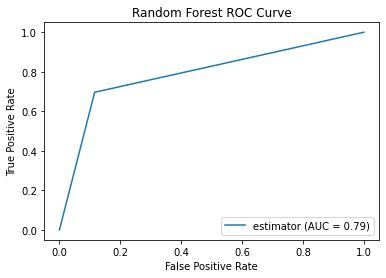

In [41]:
#ROC Curve

fpr, tpr, thresholds = metrics.roc_curve(y_test, rf_predictions)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='estimator')
display.plot()

plt.title("Random Forest ROC Curve")

#plt.savefig('RF_ROC.pdf')

plt.show()

In [42]:
rf2 = rf.best_estimator_.fit(X_train,y_train)

In [43]:
#Rank Features

for importance, name in sorted(zip(rf2.feature_importances_, X_unscaled.columns),reverse=True)[:20]:
    print (name, importance)

AgeYears 0.14685506400275367
Dental Implant: yes / no? 0.039669230495488976
Average Sagittal Abdominal Diameter (cm) 0.031856172551962936
Waist Circumference (cm) 0.031391578138329636
Body Mass Index (kg/m**2) 0.030952974971674072
Systolic: Blood pressure (first reading) mm Hg 0.02616695917181624
Arm Circumference (cm) 0.02555196777623333
Glycohemoglobin (%) 0.0248415005588947
Platelet count (%) SI 0.022770748958385455
Combined grip strength (kg) 0.02231734280414065
Height-Length difference flagged 0.020537807944818746
MaritalStatus_Unknown 0.019711412112919196
Potassium (mg) 0.01839556813293712
Diastolic: Blood pressure (second reading) mm Hg 0.018329697693682277
Blood manganese (ug/L) 0.01626924704573557
Two Hour Glucose(OGTT) (mg/dL) 0.013301126053393383
large_family 0.012887117028704684
PovertyRatio 0.012538802534018461
Blood selenium(ug/L) 0.011942279893525668
LDL-Cholesterol 0.011017565015958406


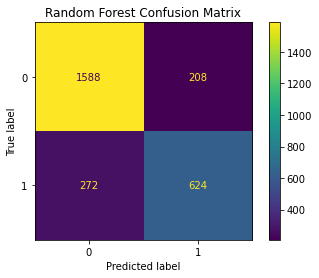

In [46]:
cm_rf = confusion_matrix(y_test, rf_predictions)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf,
                              display_labels=rf.classes_)
disp.plot()

plt.title('Random Forest Confusion Matrix')

#plt.savefig('RF_CM.pdf')

plt.show()

In [45]:
y_test_df = pd.DataFrame(y_test).reset_index()
y_prob_df_rf = pd.DataFrame(rf.predict_proba(X_test), columns = ['p_not_diabetic','p_diabetic'])
y_prob_df_rf['predicted'] = rf_predictions
y_prob_df_rf['actual'] = y_test_df['is_diabetic']
y_prob_df_rf['risk'] = 0
mask = (y_prob_df_rf['p_diabetic'] >= 0.4) & (y_prob_df_rf['p_diabetic'] <= 0.5)
y_prob_df_rf['risk'][mask] = 1
y_prob_df_rf

<ipython-input-45-fb0e4dcf360f>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,p_not_diabetic,p_diabetic,predicted,actual,risk
0,0.983571,0.016429,0,0,0
1,1.000000,0.000000,0,0,0
2,0.185187,0.814813,1,1,0
3,0.955310,0.044690,0,0,0
4,0.218546,0.781454,1,0,0
...,...,...,...,...,...
2687,0.959571,0.040429,0,0,0
2688,0.356313,0.643687,1,1,0
2689,0.530289,0.469711,0,1,1
2690,0.859739,0.140261,0,0,0


#### XGBoost

In [160]:
# Classifier
bayes_cv_tuner = BayesSearchCV(
    estimator = xgb.XGBClassifier(
        n_jobs = -1,
        objective = 'binary:logistic',
        eval_metric = 'auc',
        silent=1,
        tree_method='approx'
    ),
    search_spaces = {
        'learning_rate': (0.01, 1.0, 'log-uniform'),
        'min_child_weight': (0, 10),
        'max_depth': (0, 20),
        'subsample': (0.01, 1.0, 'uniform'),
        'colsample_bytree': (0.01, 1.0, 'uniform'),
        'colsample_bylevel': (0.01, 1.0, 'uniform'),
        'gamma': (1e-9, 0.5, 'log-uniform'),
        'min_child_weight': (0, 5),
        'n_estimators': (50, 100),
    },    
    scoring = 'roc_auc',
    cv = StratifiedKFold(
        n_splits=5,
        shuffle=True,
        random_state=42
    ),
    n_jobs = 3,
    n_iter = 10,   
    verbose = 0,
    refit = True,
    random_state = 42
)

In [165]:
result = bayes_cv_tuner.fit(X_train, y_train)

In [169]:
result.best_params_

OrderedDict([('colsample_bylevel', 0.4160029192647807),
             ('colsample_bytree', 0.7304484857455519),
             ('gamma', 0.13031389926541354),
             ('learning_rate', 0.042815319280763466),
             ('max_depth', 13),
             ('min_child_weight', 2),
             ('n_estimators', 68),
             ('subsample', 0.7421091918485163)])

In [183]:
xg_clas = xgb.XGBClassifier(objective ='binary:logistic',
                            colsample_bytree= 0.7304484857455519,
                            gamma= 0.13031389926541354,
                            learning_rate = 0.042815319280763466,
                            max_depth =13,
                            min_child_weight = 2,
                            n_estimators = 68,
                            subsample = 0.7421091918485163,
                            seed = 42)

In [184]:
xg_clas.fit(X_train,y_train)
preds = xg_clas.predict(X_test)

In [185]:
print(accuracy_score(y_test,preds))

0.8265230312035661


In [186]:
cm = confusion_matrix(y_test, preds)
cm

array([[1595,  201],
       [ 266,  630]])

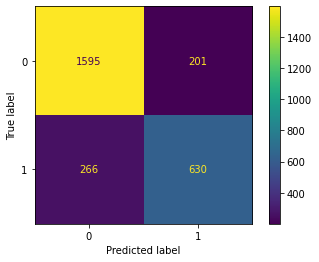

In [187]:
#Confusion Matrix

cm_xg = confusion_matrix(y_test, preds)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_xg,
                              display_labels=xg_clas.classes_)
disp.plot()

plt.show()

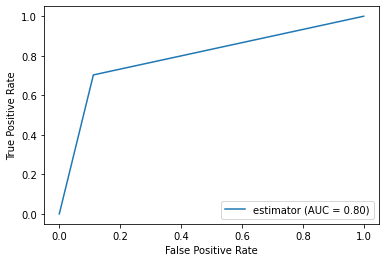

In [188]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='estimator')
display.plot()

plt.show()

In [189]:
print(xg_clas.feature_importances_)

[0.00428726 0.00555228 0.0062554  0.00535429 0.00539825 0.0055586
 0.00521681 0.00831685 0.0053419  0.00593556 0.01326227 0.00563198
 0.00642707 0.01070192 0.01209738 0.00592802 0.00523393 0.00515195
 0.00338011 0.00454211 0.00561187 0.00456158 0.0056413  0.0049304
 0.00463076 0.00320569 0.00589255 0.00413591 0.00689953 0.00485888
 0.00536377 0.00493887 0.00576344 0.00466983 0.00523657 0.00701018
 0.00506921 0.00624824 0.0059652  0.00556591 0.00516662 0.00448624
 0.00464498 0.00550029 0.00752323 0.00549993 0.00528609 0.00699985
 0.00520984 0.02085878 0.00713175 0.00533316 0.00505699 0.00492837
 0.00694123 0.00509999 0.0072116  0.00689264 0.0069954  0.00831224
 0.00637302 0.00665129 0.01408909 0.01055708 0.09752329 0.00601765
 0.00505443 0.00527635 0.00517858 0.07494214 0.01085765 0.00577909
 0.00577894 0.0049999  0.00489027 0.00699814 0.00878047 0.00547321
 0.00531017 0.00554471 0.0043727  0.00574702 0.0053969  0.00629047
 0.0007046  0.00624087 0.00427559 0.00441898 0.00786326 0.194857

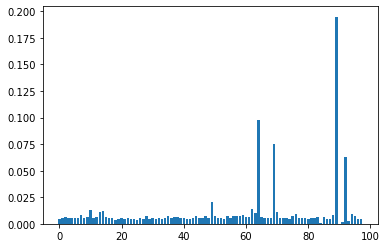

In [190]:
pyplot.bar(range(len(xg_clas.feature_importances_)), xg_clas.feature_importances_)
pyplot.show()

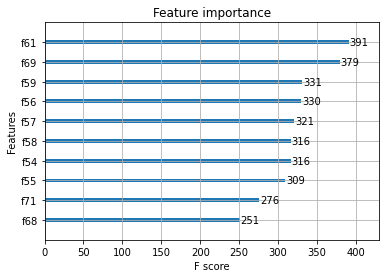

In [191]:
plot_importance(xg_clas, max_num_features=10)
pyplot.show()

In [48]:
print ('Top 5 Features: {},{},{},{},{},{},{},{},{},{} '.format(X_unscaled.columns[61],X_unscaled.columns[69],X_unscaled.columns[59],X_unscaled.columns[56],X_unscaled.columns[57],X_unscaled.columns[58],X_unscaled.columns[54],X_unscaled.columns[55],X_unscaled.columns[71],X_unscaled.columns[68]))



Top 5 Features: Combined grip strength (kg),AgeYears,Average Sagittal Abdominal Diameter (cm),Body Mass Index (kg/m**2),Arm Circumference (cm),Waist Circumference (cm),Diastolic: Blood pressure (second reading) mm Hg,Height-Length difference flagged,PovertyRatio,Theobromine (mg) 


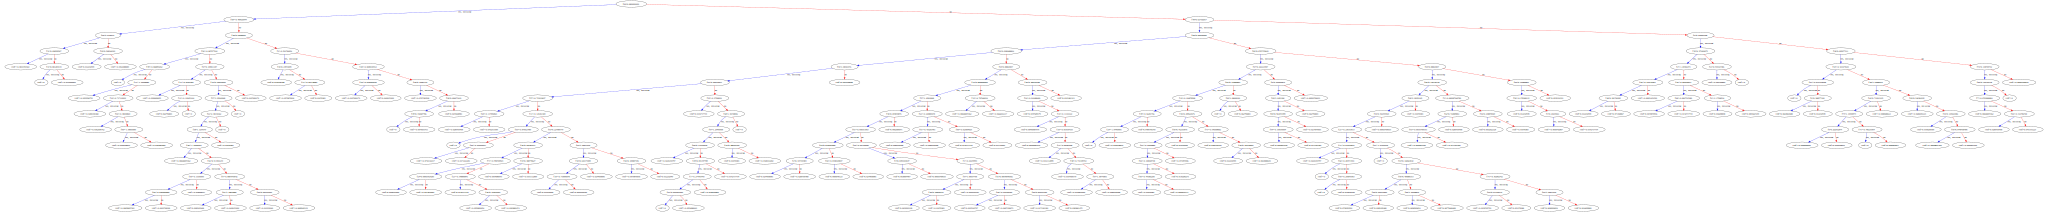

In [192]:
xgb.to_graphviz(xg_clas)

In [193]:
y_test_df = pd.DataFrame(y_test).reset_index()
y_prob_df_xg = pd.DataFrame(xg_clas.predict_proba(X_test), columns = ['p_not_diabetic','p_diabetic'])
y_prob_df_xg['predicted'] = preds
y_prob_df_xg['actual'] = y_test_df['is_diabetic']
y_prob_df_xg['risk'] = 0
mask = (y_prob_df_xg['p_diabetic'] >= 0.4) & (y_prob_df_xg['p_diabetic'] <= 0.5)
y_prob_df_xg['risk'][mask] = 1
y_prob_df_xg

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,p_not_diabetic,p_diabetic,predicted,actual,risk
0,0.962193,0.037807,0,0,0
1,0.968979,0.031021,0,0,0
2,0.109906,0.890094,1,1,0
3,0.963268,0.036732,0,0,0
4,0.167992,0.832008,1,0,0
...,...,...,...,...,...
2687,0.956057,0.043943,0,0,0
2688,0.262812,0.737188,1,1,0
2689,0.538020,0.461980,0,1,1
2690,0.924684,0.075316,0,0,0
